# import

In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# read dataset

In [9]:
dataset_path = r'C:\Users\simop\Desktop\Tesina\Mathematics-Machine-Learning\magic_dataset\magic04.csv'

In [8]:
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'label']
df=pd.read_csv(dataset_path, names=columns, header=None)

df.head(10)

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
5   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   
6   48.2468   17.3565  3.0332  0.2529  0.1515    8.5730  38.0957   10.5868   
7   26.7897   13.7595  2.5521  0.4236  0.2174   29.6339  20.4560   -2.9292   
8   96.2327   46.5165  4.1540  0.0779  0.0390  110.3550  85.0486   43.1844   
9   46.7619   15.1993  2.5786  0.3377  0.1913   24.7548  43.8771   -6.6812   

    fAlpha     fDist label  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g  
5   3.6130  238.0980     g  
6   4.7920  219.0870     g  
7   0.8120  237.1340     g  
8   4.8540  248.2260     g  
9   7.8750  102.2510     g

#2. Plots

## 2.1 seaborn 

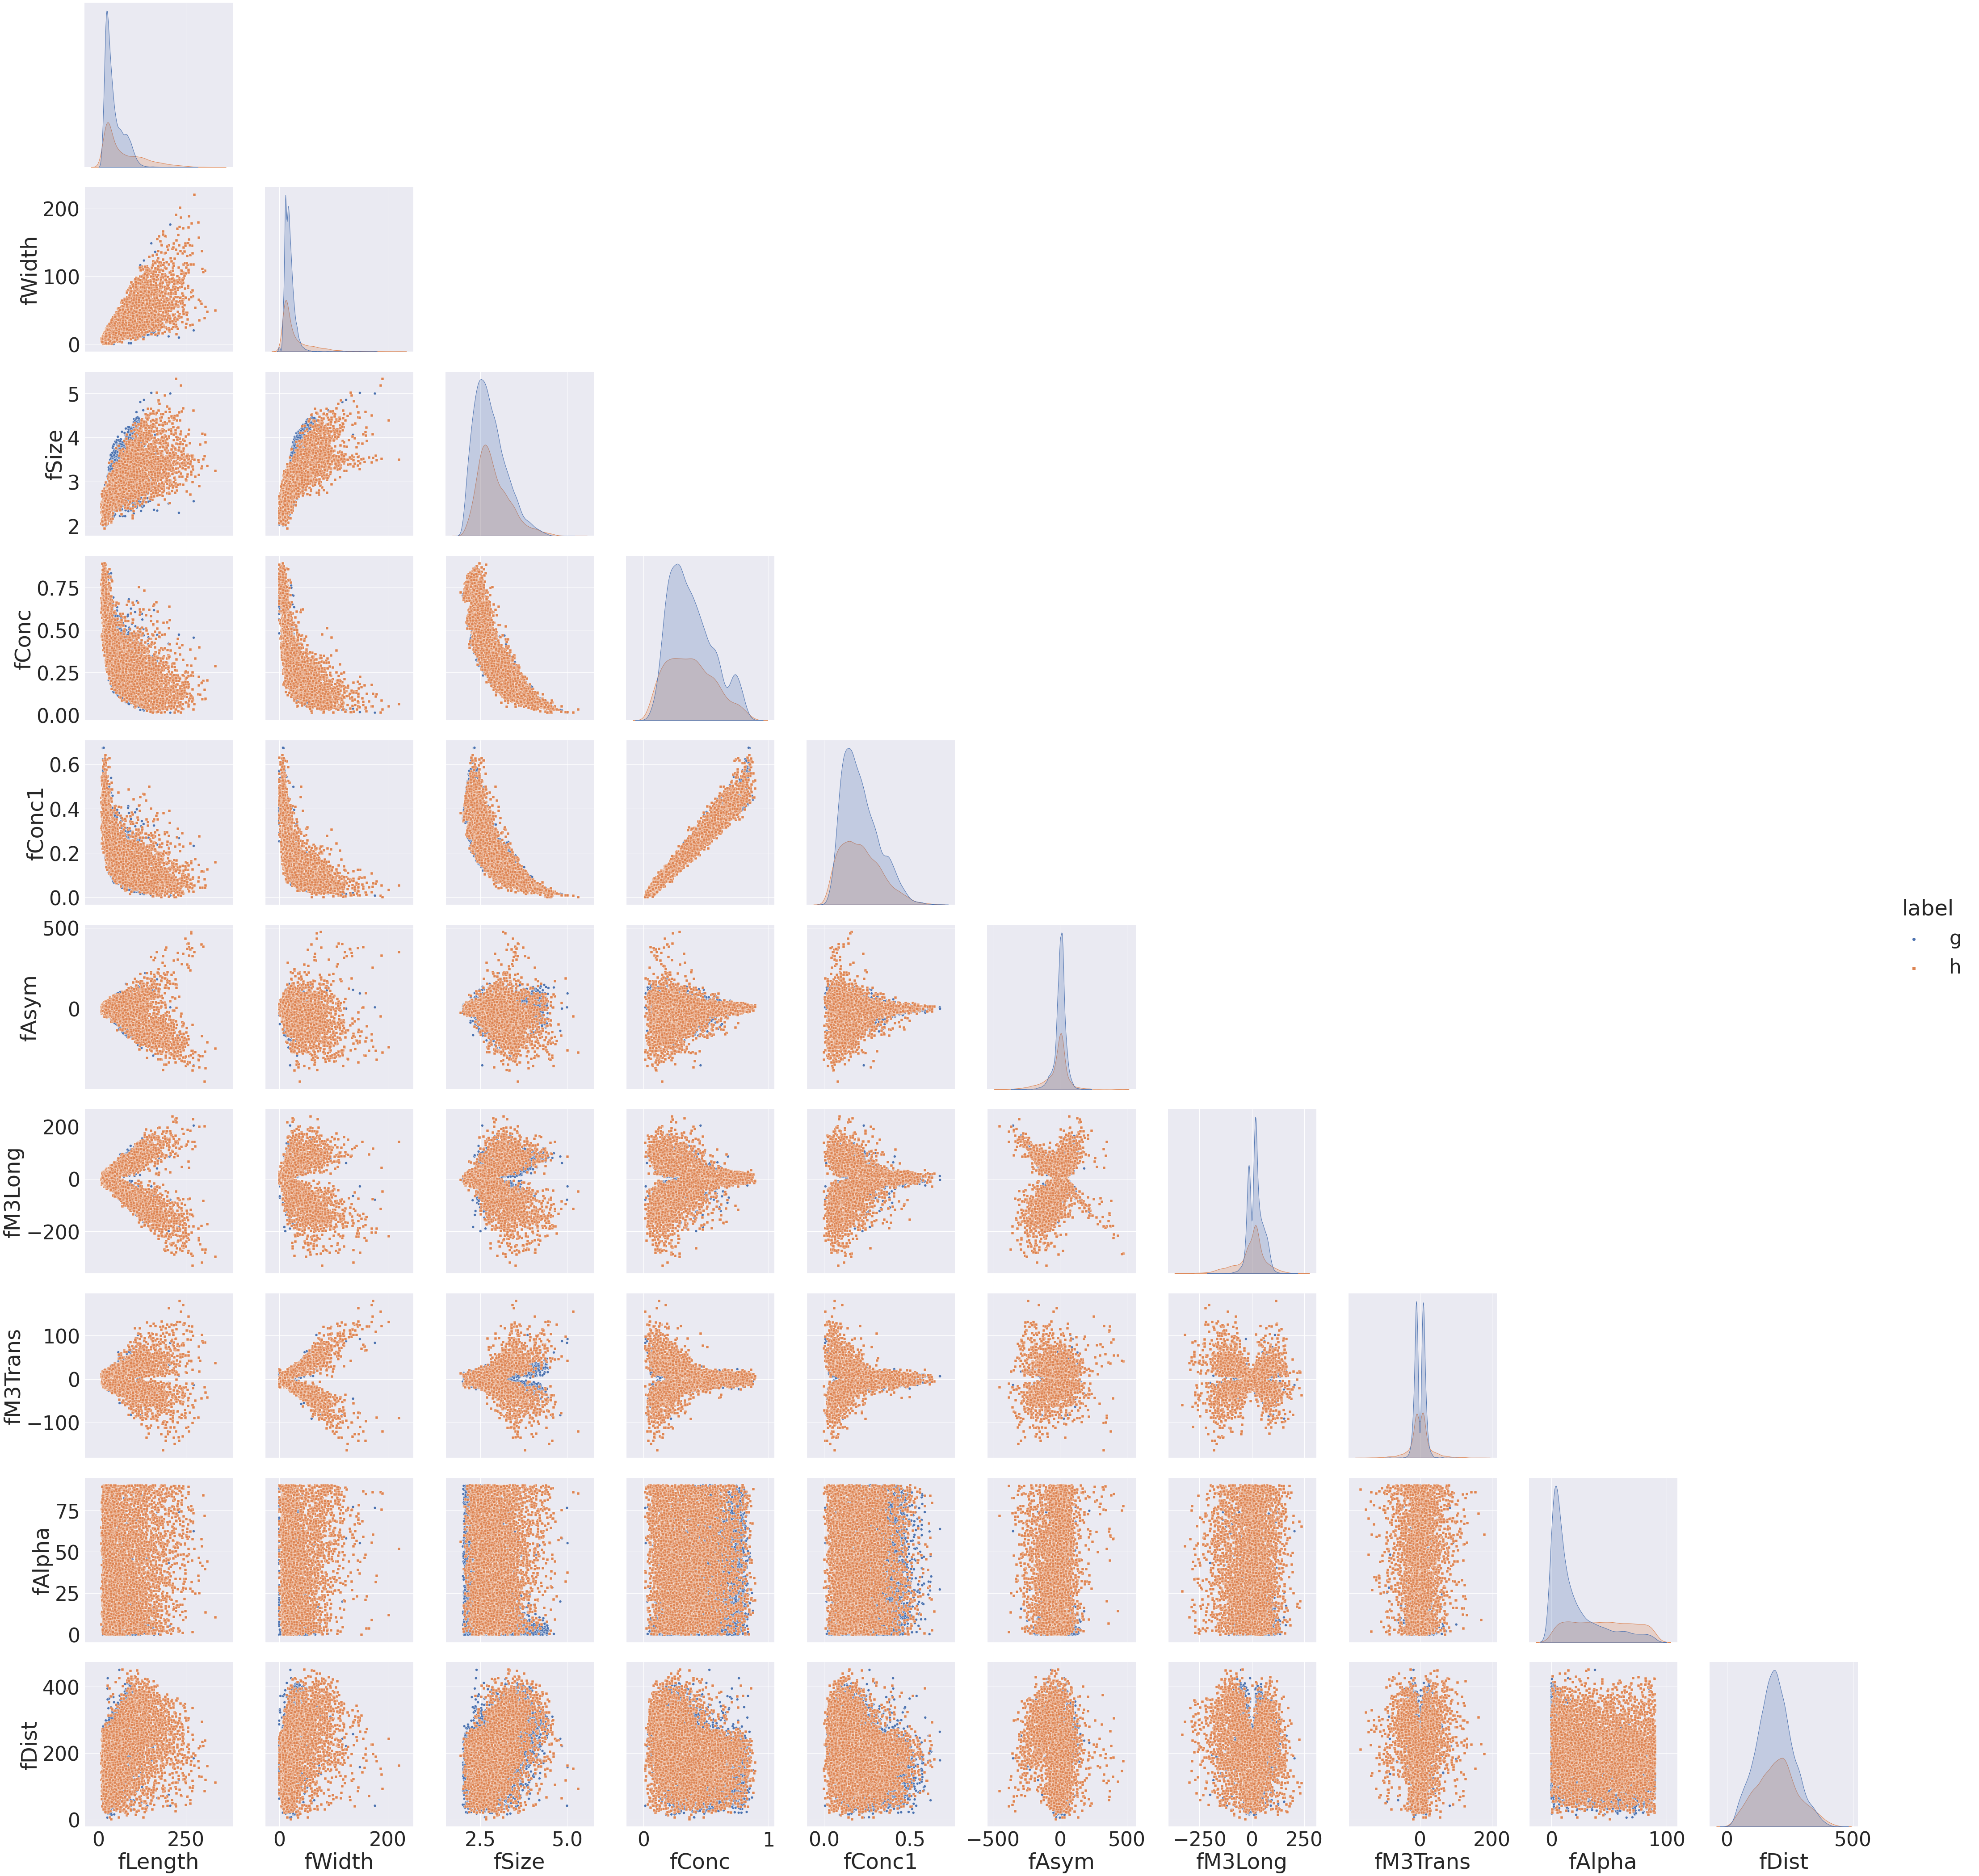

In [ ]:
sns.set(rc={'figure.figsize':(18,11)})
sns.set(font_scale=4)
x = sns.pairplot(df, hue="label", markers=["o", "s"], corner=True, height=6)
x.savefig('pairplot_features.png')
plt.show()

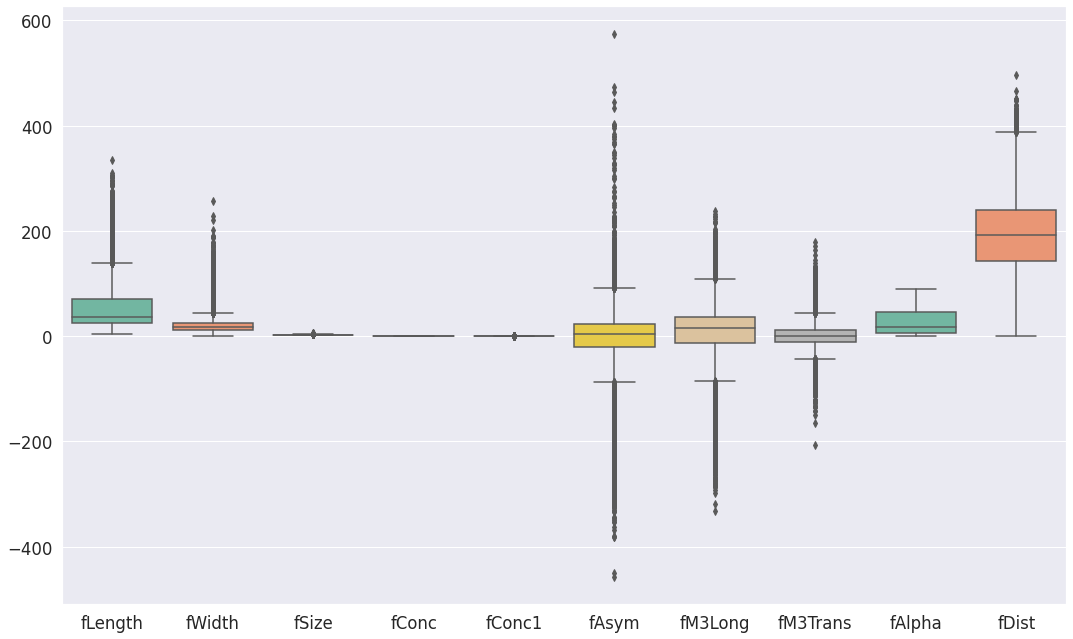

In [ ]:
sns.set(rc={'figure.figsize':(18,11)})
sns.set(font_scale=1.5)
x = sns.boxplot(data=df, orient="v", palette="Set2")
#x.figure.savefig('boxplot_features.pdf')

## correlation matrix

In [ ]:
df = df.reset_index(drop=True)

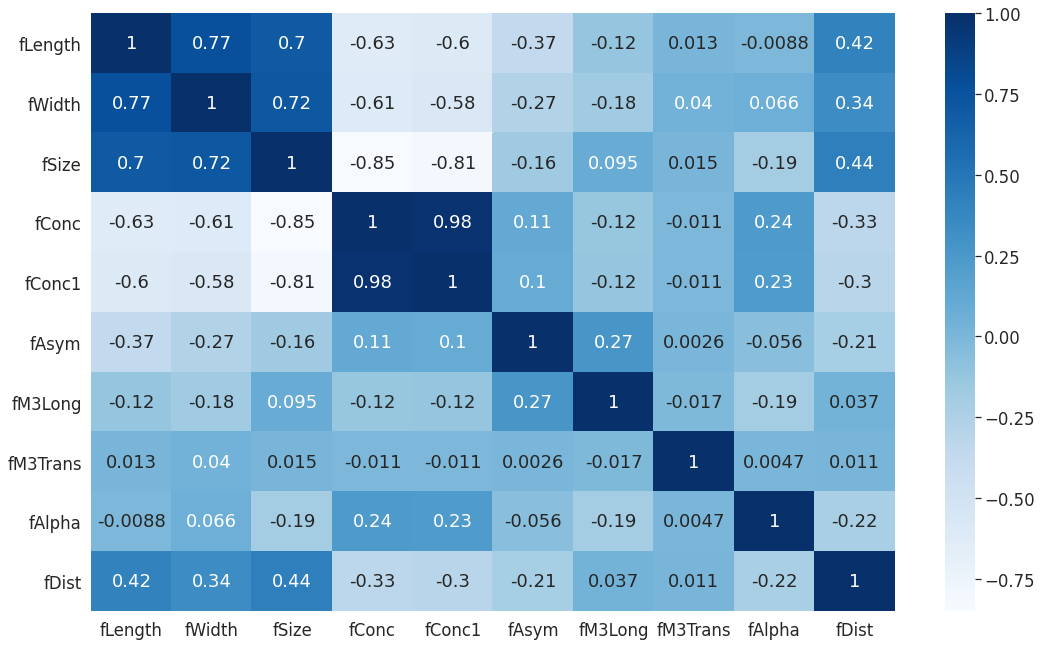

In [ ]:
sns.set(rc={'figure.figsize':(18,11)})
sns.set(font_scale=1.5)
corr_matrix = df.iloc[:,:-1].corr(method='pearson')
x = sns.heatmap(data=corr_matrix, annot=True, cmap='Blues')
x.figure.savefig('correlation_features.pdf')

there is an high correlation between :
4.  **fConc**:    continuous  # ratio of sum of two highest pixels over fSize  
5.  **fConc1**:   continuous  # ratio of highest pixel over fSize 
but this is something we could expect since these features, by contruction, are related. However, before removing one of them I will check the model results

## check balance

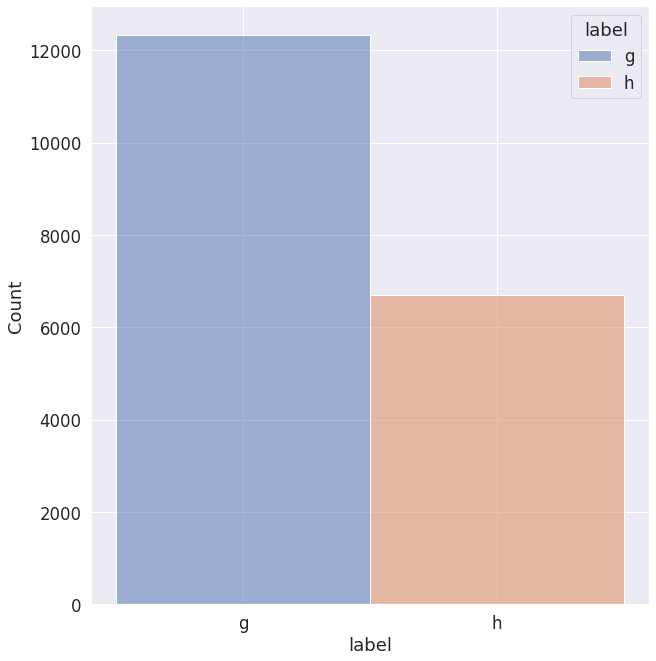

In [ ]:
sns.set(rc={'figure.figsize':(10,11)})
sns.set(font_scale=1.5)
x = sns.histplot(data=df, x="label", hue='label')
x.figure.savefig('classDistribution.pdf')


the dataset contains 65% of records labelled as Gamma and 35% of records labelled as Hadron. There is a clear imbalance that will be solved later

## Outlier detected

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
local_outlier = LocalOutlierFactor(n_neighbors=20)
outlier_mask = local_outlier.fit_predict(df.iloc[:,:-1])

In [ ]:
(outlier_mask == 1).sum(), (outlier_mask == -1).sum(), outlier_mask.shape


(18775, 245, (19020,))

In [ ]:
mask = outlier_mask==1
df_masked = df[mask]

In [ ]:
(df.label == 'g').sum(), (df.label == 'h').sum()

(12332, 6688)

In [ ]:
(df_masked.label == 'g').sum(), (df_masked.label == 'h').sum()

(12273, 6502)

In [ ]:
(df.label == 'g').sum()-(df_masked.label == 'g').sum(), (df.label == 'h').sum()-(df_masked.label == 'h').sum()

(59, 186)

In [ ]:
df_masked.describe().T

count        mean        std  ...       50%        75%       max
fLength   18775.0   52.679955  41.886691  ...   36.7372   69.04080  334.1770
fWidth    18775.0   21.770158  17.520654  ...   17.0257   24.45385  201.3640
fSize     18775.0    2.818598   0.468679  ...    2.7340    3.09240    5.0118
fConc     18775.0    0.382682   0.182373  ...    0.3576    0.50605    0.8930
fAsym     18775.0   -4.486192  58.659559  ...    3.9917   23.92515  575.2407
fM3Long   18775.0   10.375195  50.830988  ...   15.2297   35.36625  238.3210
fM3Trans  18775.0    0.279196  20.038783  ...    0.8136   10.88920  170.6920
fAlpha    18775.0   27.568544  26.073797  ...   17.5750   45.78185   90.0000
fDist     18775.0  193.796836  74.222196  ...  191.7300  240.17885  466.4078

[9 rows x 8 columns]

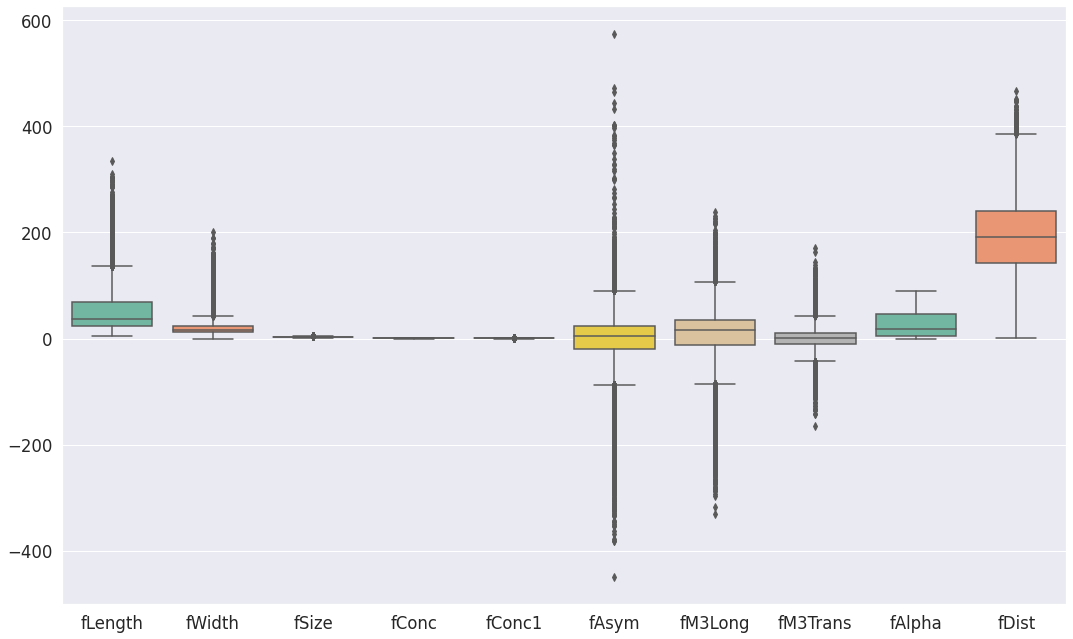

In [ ]:
sns.set(rc={'figure.figsize':(18,11)})
sns.set(font_scale=1.5)
sns.boxplot(data=df_masked, orient="v", palette="Set2")

# drop fConc1 for correlation reason

In [ ]:
df = df.drop('fConc1', axis=1)
columns = ['fLength', 'fWidth', 'fSize', 'fConc', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'label']
df.head()

fLength    fWidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  label
0   28.7967   16.0021  2.6449  0.3918  ...   -8.2027  40.0920   81.8828      g
1   31.6036   11.7235  2.5185  0.5303  ...   -9.9574   6.3609  205.2610      g
2  162.0520  136.0310  4.0612  0.0374  ...  -45.2160  76.9600  256.7880      g
3   23.8172    9.5728  2.3385  0.6147  ...   -7.1513  10.4490  116.7370      g
4   75.1362   30.9205  3.1611  0.3168  ...   21.8393   4.6480  356.4620      g

[5 rows x 10 columns]

#outlier removal

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
local_outlier = LocalOutlierFactor()

outlier_mask = local_outlier.fit_predict(df.iloc[:,:-1])

In [ ]:
mask = outlier_mask==1
df_masked = df[mask]

In [ ]:
(df.label == 'g').sum(), (df.label == 'h').sum()

(12332, 6688)

In [ ]:
(df_masked.label == 'g').sum(), (df_masked.label == 'h').sum()

(12273, 6502)

In [ ]:
(df.label == 'g').sum()-(df_masked.label == 'g').sum(), (df.label == 'h').sum()-(df_masked.label == 'h').sum()

(59, 186)

In [ ]:
df = df_masked

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18775 entries, 0 to 19019
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   18775 non-null  float64
 1   fWidth    18775 non-null  float64
 2   fSize     18775 non-null  float64
 3   fConc     18775 non-null  float64
 4   fAsym     18775 non-null  float64
 5   fM3Long   18775 non-null  float64
 6   fM3Trans  18775 non-null  float64
 7   fAlpha    18775 non-null  float64
 8   fDist     18775 non-null  float64
 9   label     18775 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


# 3.Train, Validation, Test 

In [ ]:
X = df.drop(['label'], axis=1)
y = df.label
X.shape, y.shape

((18775, 9), (18775,))

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
for i, classe in enumerate(le.classes_):
    print(i,classe)

0 g
1 h


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42, shuffle=True, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12203, 9), (12203,), (6572, 9), (6572,))

In [ ]:
 ratio_h = (y_train == 1).sum() / y_train.shape[0]
 ratio_g = (y_train == 0).sum() / y_train.shape[0]
 ratio_g, ratio_h

(0.6536917151520119, 0.3463082848479882)

In [ ]:
ratio_h = (y_test == 1).sum() / y_test.shape[0]
ratio_g = (y_test == 0).sum() / y_test.shape[0]
ratio_g, ratio_h

(0.6536822884966524, 0.34631771150334756)

## 3.2 Scale the data


In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
fitted_scaler = scaler.fit(X=X_train)

X_train_scaled = fitted_scaler.transform(X_train)
X_test_scaled = fitted_scaler.transform(X_test)

In [ ]:
trial_df = pd.DataFrame(data=np.hstack((X_train_scaled, y_train.reshape(12203 ,1))), columns=columns)


In [ ]:
from numpy import savetxt
savetxt('data.csv', trial_df.to_numpy(), delimiter=',')

# PCA

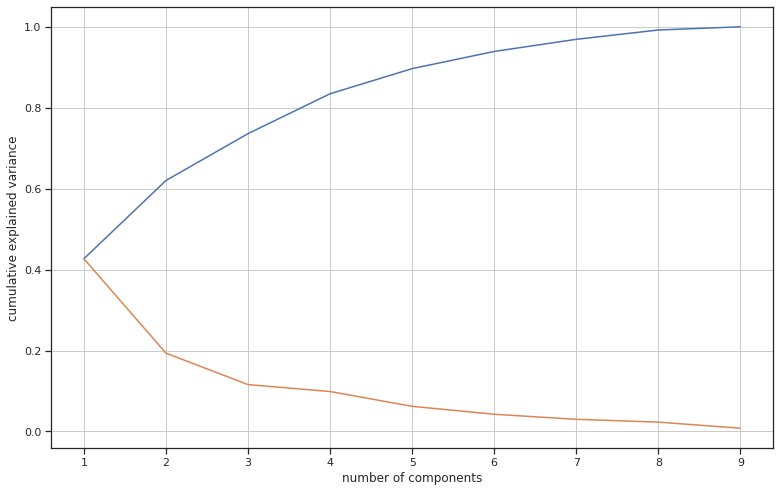

In [ ]:
from sklearn.decomposition import PCA
sns.set(rc={'figure.figsize':(11,7)})


sns.set(style="ticks")
plt.grid()

pca = PCA().fit(X_train_scaled)

sns.lineplot(x=[1,2,3,4,5,6,7,8,9,], y=np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.tight_layout()
x = sns.lineplot(x=[1,2,3,4,5,6,7,8,9], y=pca.explained_variance_ratio_)
x.figure.savefig("pca.pdf")
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.42674567, 0.62018267, 0.73596068, 0.83457422, 0.89662119,
       0.93907172, 0.96904056, 0.99206329, 1.        ])

In [ ]:
pca = PCA(n_components=6)
fitted_pca = pca.fit(X_train_scaled)

X_train_pca = fitted_pca.transform(X_train_scaled)
X_test_pca = fitted_pca.transform(X_test_scaled)
X_train_pca.shape

(12203, 6)

In [ ]:
trial_df = pd.DataFrame(data=np.hstack((X_train_pca, y_train.reshape(12203 ,1))), columns=['pca1', 'pca2','pca3','pca4','pca5', 'pca6', 'label'])
trial_df.head()

pca1      pca2      pca3      pca4      pca5      pca6  label
0 -0.809792 -1.230065 -0.082163  0.186194 -0.686503 -0.106183    0.0
1  0.068134 -0.410990  0.021757  0.744416 -0.642227 -0.261382    0.0
2 -0.945504  0.308783 -0.827724  0.175937 -0.808430  0.221437    0.0
3 -0.376665 -0.806577 -1.136534 -0.677541 -0.233091 -0.512255    0.0
4 -0.844087  0.309146  0.479932  0.754076 -0.665703  0.191885    0.0

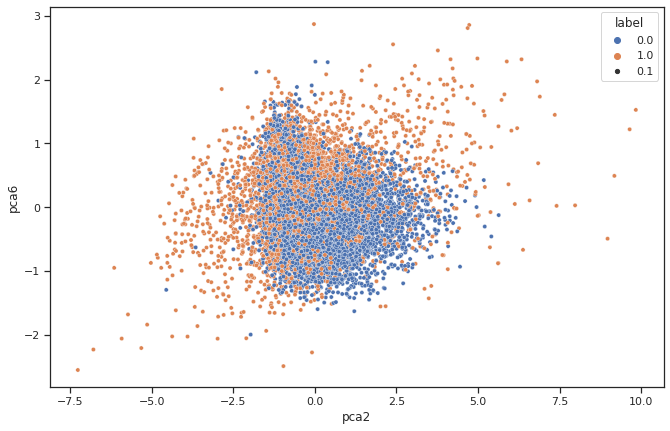

In [ ]:
sns.scatterplot(data=trial_df, x='pca2', y='pca6', hue='label', size=0.1)

## 3.stratified CV on PCA

In [ ]:
skf = StratifiedKFold(n_splits=11, shuffle=True, random_state=42)
skf.get_n_splits(X_train_pca, y_train)
print(skf)

StratifiedKFold(n_splits=11, random_state=42, shuffle=True)


## 3.stratified CV no PCA

In [ ]:
skf_noPca = StratifiedKFold(n_splits=11, shuffle=True, random_state=42)
skf_noPca.get_n_splits(X_train_scaled, y_train)
print(skf_noPca)

StratifiedKFold(n_splits=11, random_state=42, shuffle=True)


# 4. Model creation

## 4.1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)
params_rf = {'classifier__n_estimators': [20, 50, 100, 150],
             'classifier__criterion': ['gini', 'entropy'],
             'classifier__max_depth': [ 5, 8, 10, 12, 15, 20]
             }

## 4.2 SVM

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
params_svm_linear = {'classifier__C': [0.4, 0.6, 0.8, 1.0, 1.2, 1.5],
             'classifier__kernel': ['linear'],
            }

params_svm_rbf = {'classifier__C': [0.4, 0.6, 0.8, 1.0, 1.2, 1.5],
             'classifier__kernel': ['rbf'],
             }
             
params_svm_polynomial = {'classifier__C':[0.4, 0.6, 0.8, 1.0, 1.2, 1.5],
             'classifier__kernel': ['poly'],
             'classifier__degree': [3, 4, 5, 6, 7, 8]
             }

## 4.3 logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
params_lr = {'classifier__penalty': ['l1', 'l2'],
             'classifier__C': [0.4, 0.6, 0.8, 1.0, 1.2, 1.5],
             'classifier__solver': ['liblinear'] 
             }

#pipeline for imbalance dataset

In [ ]:
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE

#creation of pipeline for imbalanced dataset 
pipeline_rf = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', model_rf]])

pipeline_svm = imbpipeline(steps = [['smote', SMOTE()],
                                    ['classifier', model_svm]])

pipeline_lr = imbpipeline(steps = [['smote', SMOTE()],
                                   ['classifier', model_lr]])

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# random grid search for random forest
randomized_grid_rf = RandomizedSearchCV(estimator=pipeline_rf, scoring='f1', param_distributions=params_rf, cv=skf, refit=True)

#random grid search for svm
randomized_grid_svm_linear = RandomizedSearchCV(estimator=pipeline_svm, scoring='f1', param_distributions=params_svm_linear, cv=skf, refit=True)
randomized_grid_svm_rbf = RandomizedSearchCV(estimator=pipeline_svm, scoring='f1', param_distributions=params_svm_rbf, cv=skf, refit=True)
randomized_grid_svm_poly = RandomizedSearchCV(estimator=pipeline_svm, scoring='f1', param_distributions=params_svm_polynomial, cv=skf, refit=True)

#random grid search for logistic regression
randomized_grid_lr = RandomizedSearchCV(estimator=pipeline_lr, scoring='f1', param_distributions=params_lr, cv=skf, refit=True)

# results

# With PCA = 6

## Random forest


In [ ]:
search_rf = randomized_grid_rf.fit(X_train_pca, y_train)

In [ ]:
print(search_rf.best_score_, search_rf.best_params_)

0.7020442556314005 {'classifier__n_estimators': 150, 'classifier__max_depth': 15, 'classifier__criterion': 'entropy'}


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [ ]:
print(classification_report(y_test, search_rf.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4296
           1       0.71      0.74      0.72      2276

    accuracy                           0.80      6572
   macro avg       0.78      0.79      0.78      6572
weighted avg       0.80      0.80      0.80      6572



Text(0.5, 1.0, 'Confusion Matrix Random Forest best estimator with PCA=6')

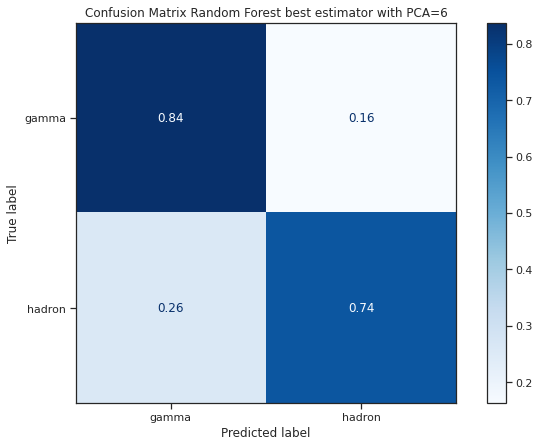

In [ ]:
disp_rf = plot_confusion_matrix(search_rf.best_estimator_, X_test_pca, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix Random Forest best estimator with PCA=6')

In [ ]:
disp_rf.figure_.savefig('confusion_rf_pca.pdf')

Text(0.5, 1.0, 'Roc curve Random Forest best estimator with PCA=6')

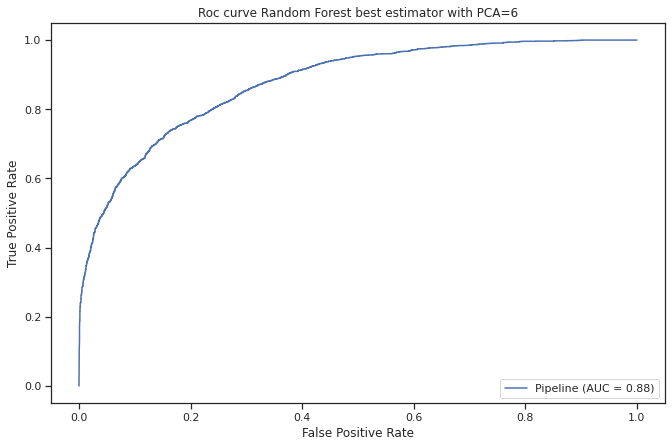

In [ ]:
x = plot_roc_curve(search_rf.best_estimator_, X_test_pca, y_test) 
plt.title('Roc curve Random Forest best estimator with PCA=6')

In [ ]:
x.figure_.savefig('roc_rf_pca.pdf')

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(150, max_depth=15, criterion='entropy'), X_train_pca, y_train, cv=skf, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


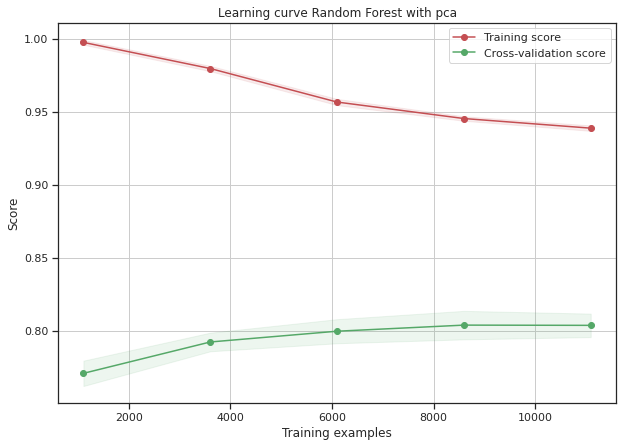

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve Random Forest with pca')

plt.show()

In [ ]:
fig.savefig('learning_curve_rf_pca.pdf')

## SVM

### SVM linear

In [ ]:
search_svm_linear = randomized_grid_svm_linear.fit(X_train_pca, y_train)

In [ ]:
print(search_svm_linear.best_score_, search_svm_linear.best_params_)

0.6601401811992544 {'classifier__kernel': 'linear', 'classifier__C': 1.5}


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [ ]:
print(classification_report(y_test, search_svm_linear.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      4296
           1       0.64      0.70      0.67      2276

    accuracy                           0.76      6572
   macro avg       0.74      0.75      0.74      6572
weighted avg       0.77      0.76      0.76      6572



Text(0.5, 1.0, 'Confusion Matrix linear SVM best estimator with PCA=6')

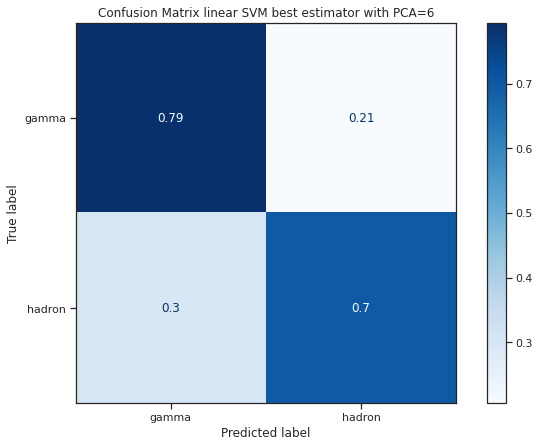

In [ ]:

disp_rf = plot_confusion_matrix(search_svm_linear.best_estimator_, X_test_pca, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix linear SVM best estimator with PCA=6')

In [ ]:
disp_rf.figure_.savefig('confusion_svm_linear_pca.pdf')

Text(0.5, 1.0, 'Roc curve linear SVM  best estimator with PCA=6')

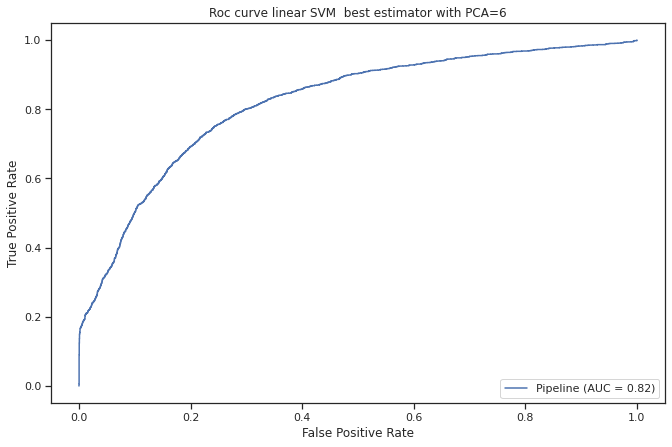

In [ ]:
x = plot_roc_curve(search_svm_linear.best_estimator_, X_test_pca, y_test) 
plt.title('Roc curve linear SVM  best estimator with PCA=6')

In [ ]:
x.figure_.savefig('roc_svm_linear_pca.pdf')

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='linear', C=1.5), X_train_pca, y_train, cv=skf, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


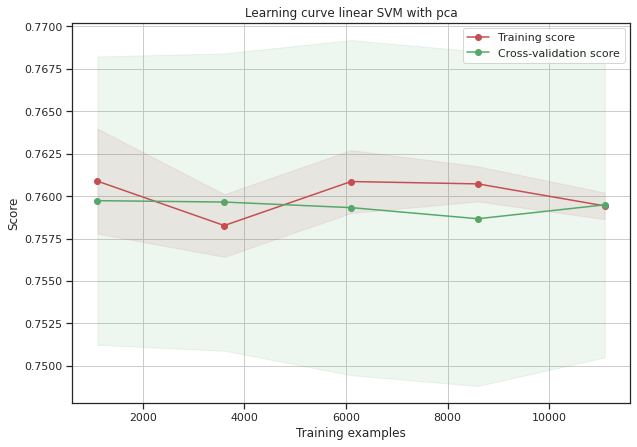

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve linear SVM with pca')
plt.show()

In [ ]:
fig.savefig('learning_curve_svm_linear_pca.pdf')

### SVM rbf

In [ ]:
search_svm_rbf = randomized_grid_svm_rbf.fit(X_train_pca, y_train)

In [ ]:
print(search_svm_rbf.best_score_, search_svm_rbf.best_params_)

0.7066361450055823 {'classifier__kernel': 'rbf', 'classifier__C': 1.2}


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [ ]:
print(classification_report(y_test, search_svm_rbf.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4296
           1       0.69      0.73      0.71      2276

    accuracy                           0.80      6572
   macro avg       0.77      0.78      0.78      6572
weighted avg       0.80      0.80      0.80      6572



Text(0.5, 1.0, 'Confusion Matrix rbf SVM best estimator with PCA=6')

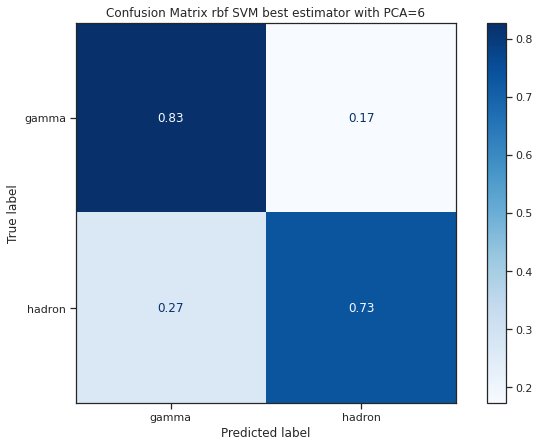

In [ ]:
disp_rf = plot_confusion_matrix(search_svm_rbf.best_estimator_, X_test_pca, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix rbf SVM best estimator with PCA=6')

In [ ]:
disp_rf.figure_.savefig('confusion_svm_rbf_pca.pdf')

Text(0.5, 1.0, 'Roc curve rbf SVM best estimator with PCA=6')

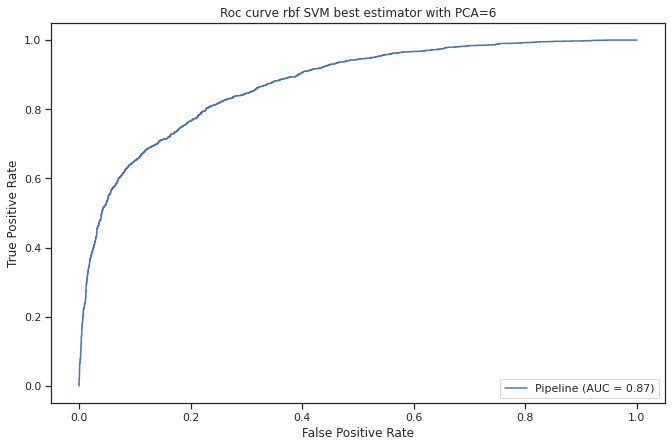

In [ ]:
x = plot_roc_curve(search_svm_rbf.best_estimator_, X_test_pca, y_test) 
plt.title('Roc curve rbf SVM best estimator with PCA=6')

In [ ]:
x.figure_.savefig('roc_svm_rbf_pca.pdf')

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='rbf', C=1.2), X_train_pca, y_train, cv=skf, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

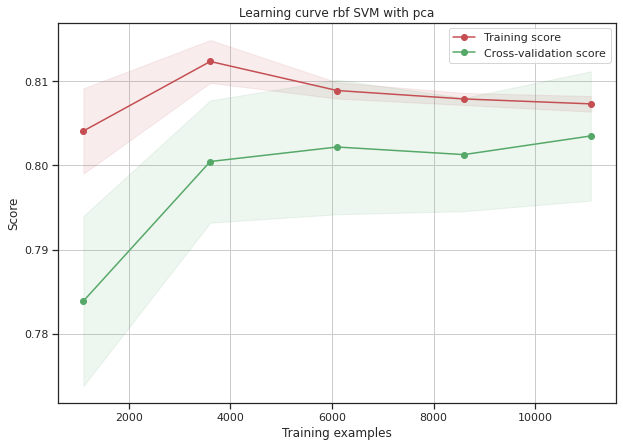

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve rbf SVM with pca')
plt.show()

In [ ]:
fig.savefig('learning_curve_svm_rbf_pca.pdf')

### SVM polynomial

In [ ]:
search_svm_poly = randomized_grid_svm_poly.fit(X_train_pca, y_train)

In [ ]:
print(search_svm_poly.best_score_, search_svm_poly.best_params_)

0.5898122303633618 {'classifier__kernel': 'poly', 'classifier__degree': 3, 'classifier__C': 1.0}


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [ ]:
print(classification_report(y_test, search_svm_poly.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      4296
           1       0.69      0.53      0.60      2276

    accuracy                           0.76      6572
   macro avg       0.74      0.70      0.71      6572
weighted avg       0.75      0.76      0.75      6572



Text(0.5, 1.0, 'Confusion Matrix polynomial SVM best estimator with PCA=6')

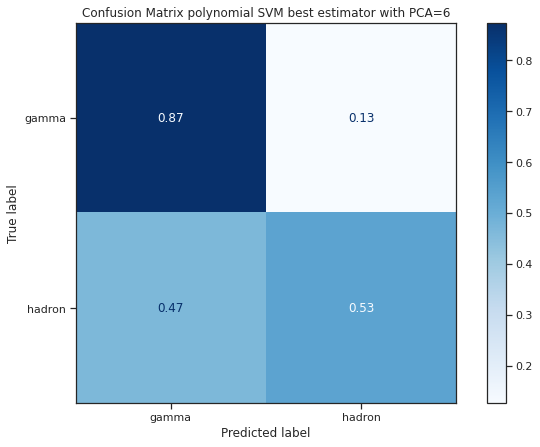

In [ ]:
disp_rf = plot_confusion_matrix(search_svm_poly.best_estimator_, X_test_pca, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix polynomial SVM best estimator with PCA=6')

In [ ]:
disp_rf.figure_.savefig('confusion_svm_polynomial_pca.pdf')

Text(0.5, 1.0, 'Roc curve polynomial SVM best estimator with PCA=6')

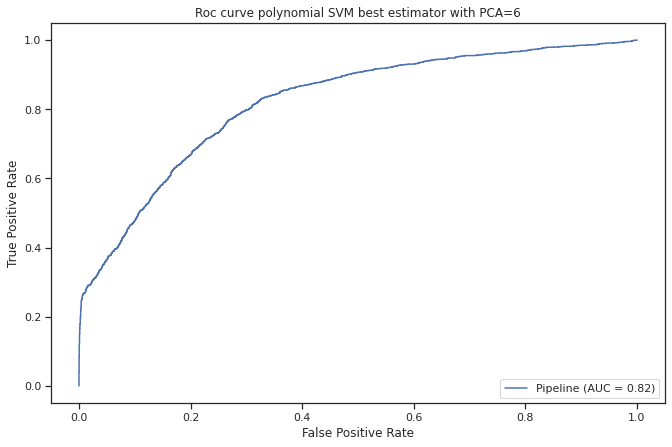

In [ ]:
x = plot_roc_curve(search_svm_poly.best_estimator_, X_test_pca, y_test) 
plt.title('Roc curve polynomial SVM best estimator with PCA=6')

In [ ]:
x.figure_.savefig('roc_svm_polynomial_pca.pdf')

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='poly', C=1.0, degree=3), X_train_pca, y_train, cv=skf, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


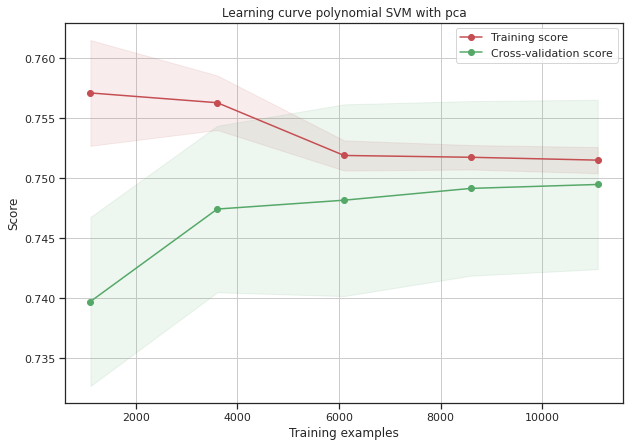

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve polynomial SVM with pca')
plt.show()

In [ ]:
fig.savefig('learning_curve_svm_polynomial_pca.pdf')

## Logistic Regression

In [ ]:
search_lr = randomized_grid_lr.fit(X_train_pca, y_train)

In [ ]:
print(search_lr.best_score_, search_lr.best_params_)

0.6604441927980592 {'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__C': 0.8}


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [ ]:
print(classification_report(y_test, search_lr.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.83      0.80      0.82      4296
           1       0.65      0.70      0.67      2276

    accuracy                           0.76      6572
   macro avg       0.74      0.75      0.74      6572
weighted avg       0.77      0.76      0.77      6572



Text(0.5, 1.0, 'Confusion Matrix Logistic Regression best estimator with PCA=6')

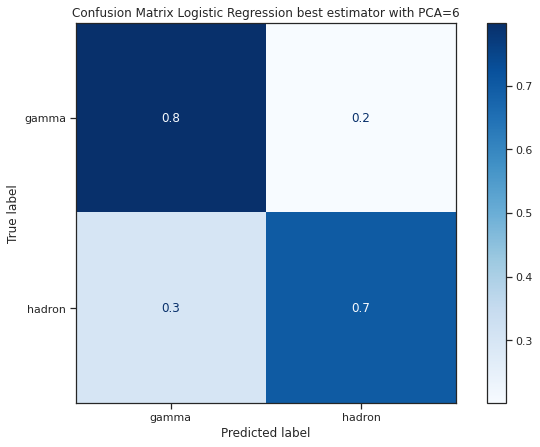

In [ ]:
disp_rf = plot_confusion_matrix(search_lr.best_estimator_, X_test_pca, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix Logistic Regression best estimator with PCA=6')

In [ ]:
disp_rf.figure_.savefig('confusion_logistic_regression_pca.pdf')

Text(0.5, 1.0, 'Roc curve Logistic Regression best estimator with PCA=6')

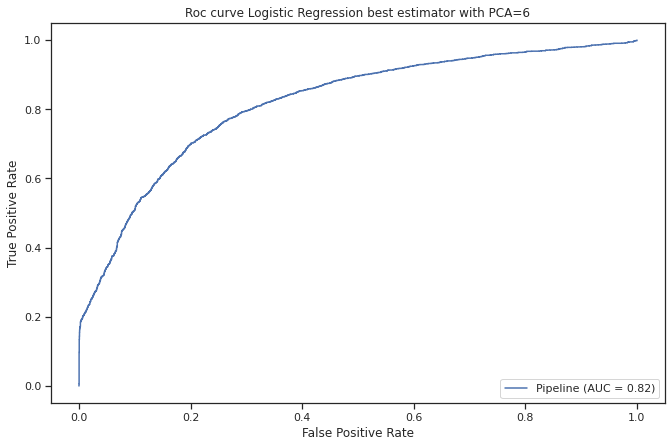

In [ ]:
x = plot_roc_curve(search_lr.best_estimator_, X_test_pca, y_test) 
plt.title('Roc curve Logistic Regression best estimator with PCA=6')

In [ ]:
x.figure_.savefig('roc_logistic_regression_pca.pdf')

In [ ]:
{'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__C': 0.8}

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(solver='liblinear', penalty='l1', C=0.8), X_train_pca, y_train, cv=skf, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

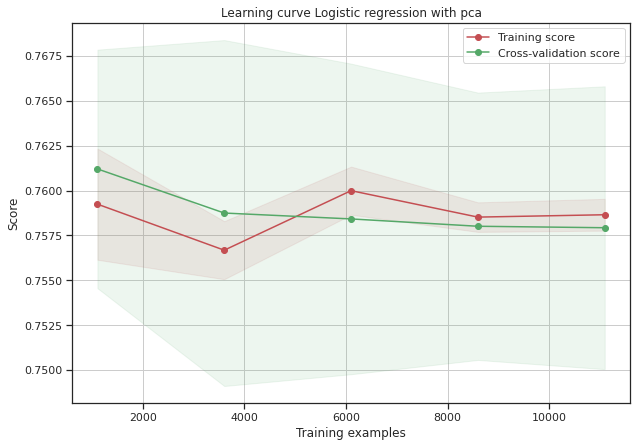

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve Logistic regression with pca')
plt.show()

In [ ]:
fig.savefig('learning_curve_logistic_regression_pca.pdf')

# Without PCA

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# random grid search for random forest
randomized_grid_rf = RandomizedSearchCV(estimator=pipeline_rf, scoring='f1', param_distributions=params_rf, cv=skf_noPca, refit=True)

#random grid search for svm
randomized_grid_svm_linear = RandomizedSearchCV(estimator=pipeline_svm, scoring='f1', param_distributions=params_svm_linear, cv=skf_noPca, refit=True)
randomized_grid_svm_rbf = RandomizedSearchCV(estimator=pipeline_svm, scoring='f1', param_distributions=params_svm_rbf, cv=skf_noPca, refit=True)
randomized_grid_svm_poly = RandomizedSearchCV(estimator=pipeline_svm, scoring='f1', param_distributions=params_svm_polynomial, cv=skf_noPca, refit=True)

#random grid search for logistic regression
randomized_grid_lr = RandomizedSearchCV(estimator=pipeline_lr, scoring='f1', param_distributions=params_lr, cv=skf, refit=True)

## Random forest


In [ ]:
search_rf = randomized_grid_rf.fit(X_train_scaled, y_train)

In [ ]:
print(search_rf.best_score_, search_rf.best_params_)

0.8101036554850382 {'classifier__n_estimators': 100, 'classifier__max_depth': 20, 'classifier__criterion': 'gini'}


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [ ]:
print(classification_report(y_test, search_rf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4296
           1       0.83      0.81      0.82      2276

    accuracy                           0.87      6572
   macro avg       0.86      0.86      0.86      6572
weighted avg       0.87      0.87      0.87      6572



Text(0.5, 1.0, 'Confusion Matrix Random Forest best estimator')

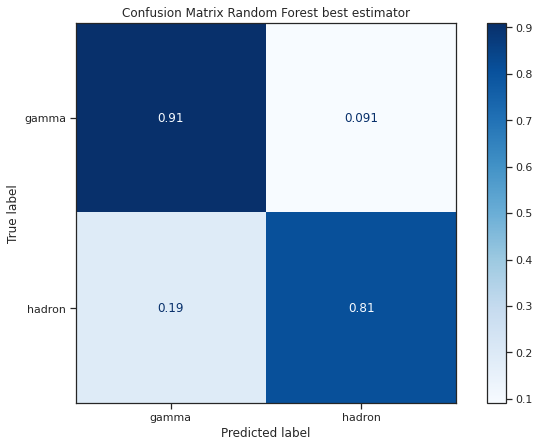

In [ ]:
disp_rf = plot_confusion_matrix(search_rf.best_estimator_, X_test_scaled, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix Random Forest best estimator')

In [ ]:
disp_rf.figure_.savefig('confusion_rf.pdf')

Text(0.5, 1.0, 'Roc curve Random Forest best estimator')

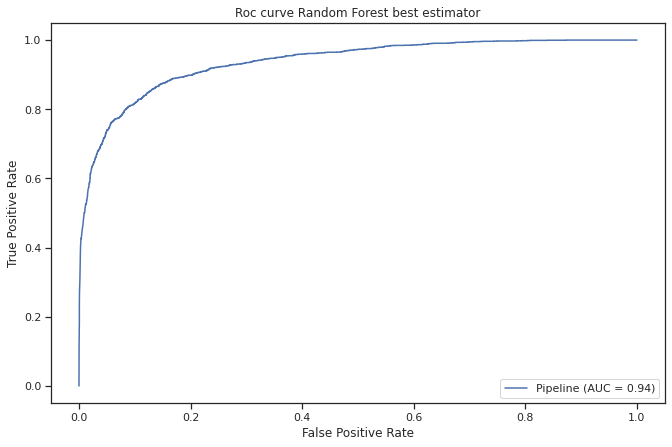

In [ ]:
x = plot_roc_curve(search_rf.best_estimator_, X_test_scaled, y_test) 
plt.title('Roc curve Random Forest best estimator')

In [ ]:
x.figure_.savefig('roc_rf.pdf')

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
#{'classifier__n_estimators': 100, 'classifier__max_depth': 20, 'classifier__criterion': 'gini'}

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(100, max_depth=20, criterion='gini'), X_train_scaled, y_train, cv=skf_noPca, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


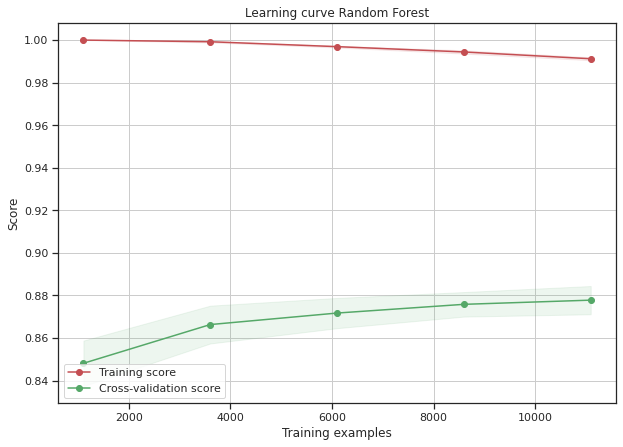

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve Random Forest')

plt.show()

In [ ]:
fig.savefig('learning_curve_rf.pdf')

## SVM

### SVM linear

In [ ]:
search_svm_linear = randomized_grid_svm_linear.fit(X_train_scaled, y_train)

In [ ]:
print(search_svm_linear.best_score_, search_svm_linear.best_params_)

0.6960044035203777 {'classifier__kernel': 'linear', 'classifier__C': 1.2}


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [ ]:
print(classification_report(y_test, search_svm_linear.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      4296
           1       0.69      0.72      0.71      2276

    accuracy                           0.79      6572
   macro avg       0.77      0.77      0.77      6572
weighted avg       0.79      0.79      0.79      6572



Text(0.5, 1.0, 'Confusion Matrix linear SVM best estimator')

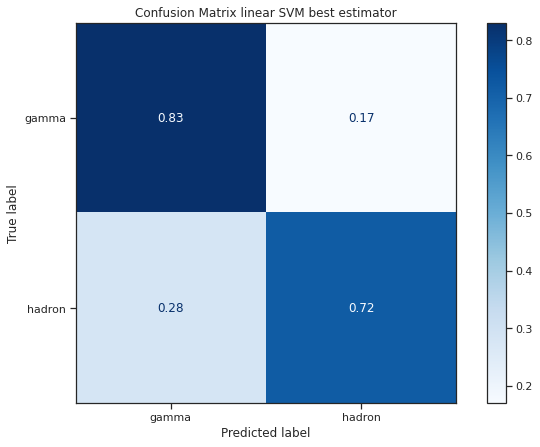

In [ ]:

disp_rf = plot_confusion_matrix(search_svm_linear.best_estimator_, X_test_scaled, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix linear SVM best estimator')

In [ ]:
disp_rf.figure_.savefig('confusion_svm_linear.pdf')

Text(0.5, 1.0, 'Roc curve linear SVM  best estimator ')

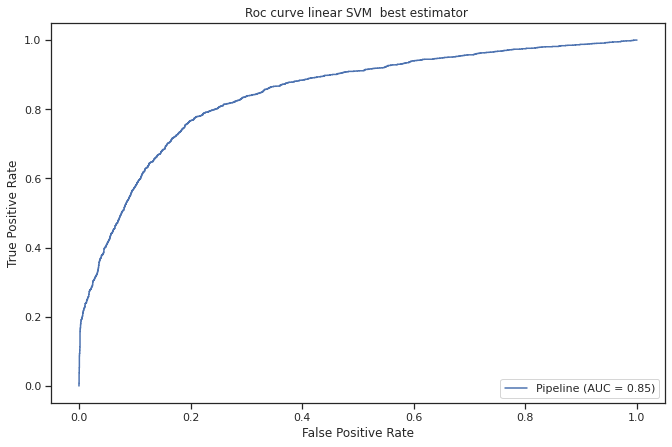

In [ ]:
x = plot_roc_curve(search_svm_linear.best_estimator_, X_test_scaled, y_test) 
plt.title('Roc curve linear SVM  best estimator ')

In [ ]:
x.figure_.savefig('roc_svm_linear.pdf')

In [ ]:
#0.6960044035203777 {'classifier__kernel': 'linear', 'classifier__C': 1.2}

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='linear', C=1.2), X_train_scaled, y_train, cv=skf_noPca, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


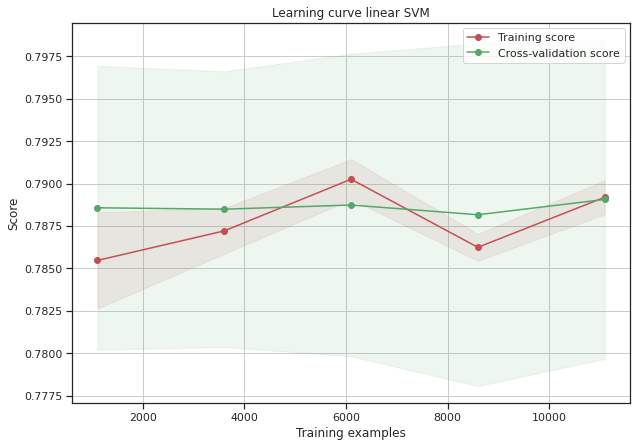

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve linear SVM')
plt.show()

In [ ]:
fig.savefig('learning_curve_svm_linear.pdf')

### SVM rbf

In [ ]:
search_svm_rbf = randomized_grid_svm_rbf.fit(X_train_scaled, y_train)

In [ ]:
print(search_svm_rbf.best_score_, search_svm_rbf.best_params_)

0.8017943038763193 {'classifier__kernel': 'rbf', 'classifier__C': 1.2}


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [ ]:
print(classification_report(y_test, search_svm_rbf.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      4296
           1       0.81      0.80      0.80      2276

    accuracy                           0.87      6572
   macro avg       0.85      0.85      0.85      6572
weighted avg       0.87      0.87      0.87      6572



Text(0.5, 1.0, 'Confusion Matrix rbf SVM best estimator')

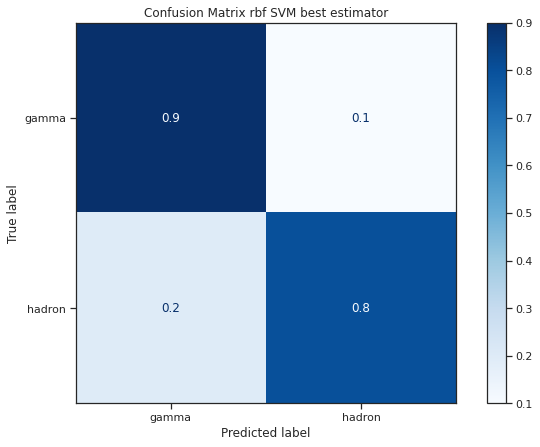

In [ ]:
disp_rf = plot_confusion_matrix(search_svm_rbf.best_estimator_, X_test_scaled, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix rbf SVM best estimator')

In [ ]:
disp_rf.figure_.savefig('confusion_svm_rbf.pdf')

Text(0.5, 1.0, 'Roc curve rbf SVM best estimator')

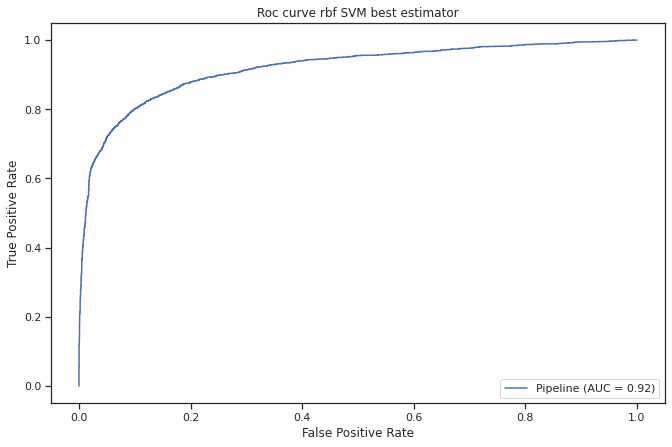

In [ ]:
x = plot_roc_curve(search_svm_rbf.best_estimator_, X_test_scaled, y_test) 
plt.title('Roc curve rbf SVM best estimator')

In [ ]:
x.figure_.savefig('roc_svm_rbf.pdf')

In [ ]:
#{'classifier__kernel': 'rbf', 'classifier__C': 1.2}

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='rbf', C=1.2), X_train_scaled, y_train, cv=skf_noPca, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

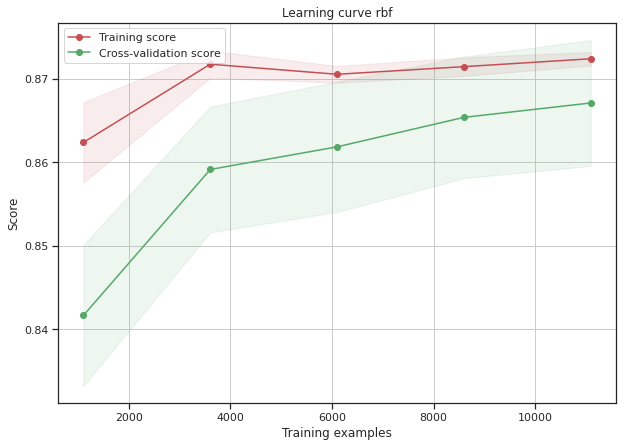

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve rbf')
plt.show()

In [ ]:
fig.savefig('learning_curve_svm_rbf.pdf')

### SVM polynomial

In [ ]:
search_svm_poly = randomized_grid_svm_poly.fit(X_train_scaled, y_train)

In [ ]:
print(search_svm_poly.best_score_, search_svm_poly.best_params_)

0.6923030984953583 {'classifier__kernel': 'poly', 'classifier__degree': 3, 'classifier__C': 1.2}


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [ ]:
print(classification_report(y_test, search_svm_poly.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4296
           1       0.84      0.59      0.70      2276

    accuracy                           0.82      6572
   macro avg       0.83      0.77      0.78      6572
weighted avg       0.82      0.82      0.81      6572



Text(0.5, 1.0, 'Confusion Matrix polynomial SVM best estimator')

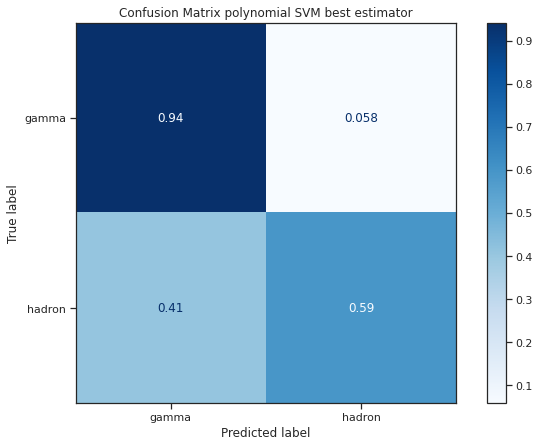

In [ ]:
disp_rf = plot_confusion_matrix(search_svm_poly.best_estimator_, X_test_scaled, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix polynomial SVM best estimator')

In [ ]:
disp_rf.figure_.savefig('confusion_svm_polynomial.pdf')

Text(0.5, 1.0, 'Roc curve polynomial SVM best estimator')

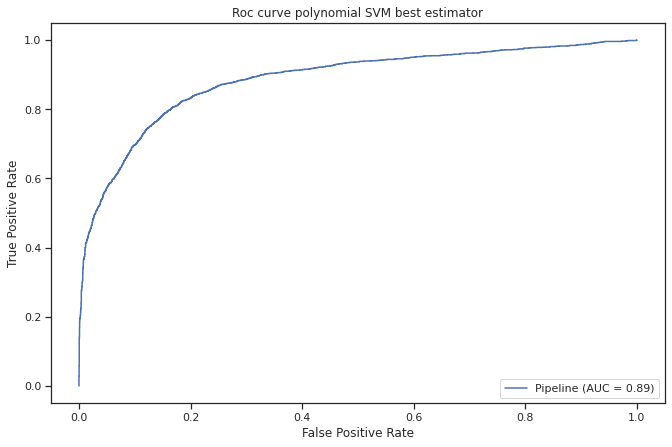

In [ ]:
x = plot_roc_curve(search_svm_poly.best_estimator_, X_test_scaled, y_test) 
plt.title('Roc curve polynomial SVM best estimator')

In [ ]:
x.figure_.savefig('roc_svm_polynomial.pdf')

In [ ]:
#{'classifier__kernel': 'poly', 'classifier__degree': 3, 'classifier__C': 1.2}

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel='poly', C=1.2, degree=3), X_train_scaled, y_train, cv=skf_noPca, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


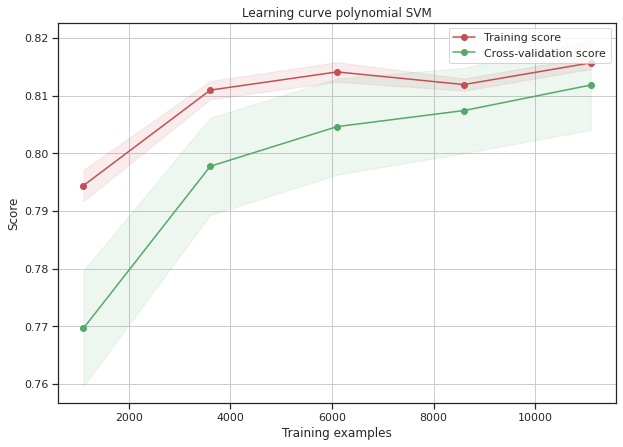

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve polynomial SVM')
plt.show()

In [ ]:
fig.savefig('learning_curve_svm_polynomial.pdf')

## Logistic Regression

In [ ]:
search_lr = randomized_grid_lr.fit(X_train_scaled, y_train)

In [ ]:
print(search_lr.best_score_, search_lr.best_params_)

0.6962258399871752 {'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__C': 1.5}


In [ ]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, classification_report

In [ ]:
print(classification_report(y_test, search_lr.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4296
           1       0.68      0.73      0.71      2276

    accuracy                           0.79      6572
   macro avg       0.77      0.78      0.77      6572
weighted avg       0.79      0.79      0.79      6572



Text(0.5, 1.0, 'Confusion Matrix Logistic Regression best estimator')

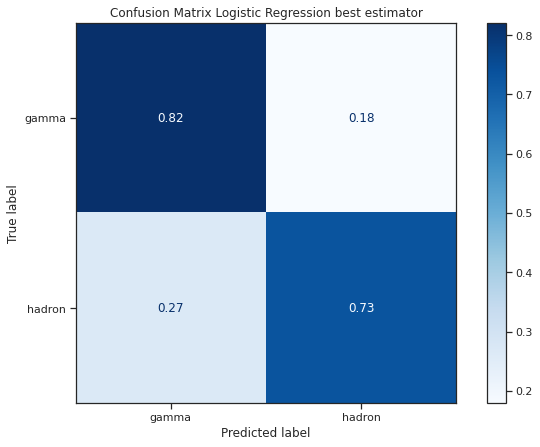

In [ ]:
disp_rf = plot_confusion_matrix(search_lr.best_estimator_, X_test_scaled, y_test,
                                display_labels=['gamma', 'hadron'],
                                cmap=plt.cm.Blues,
                                normalize='true')
plt.title('Confusion Matrix Logistic Regression best estimator')

In [ ]:
disp_rf.figure_.savefig('confusion_logistic_regression.pdf')

Text(0.5, 1.0, 'Roc curve Logistic Regression best estimator')

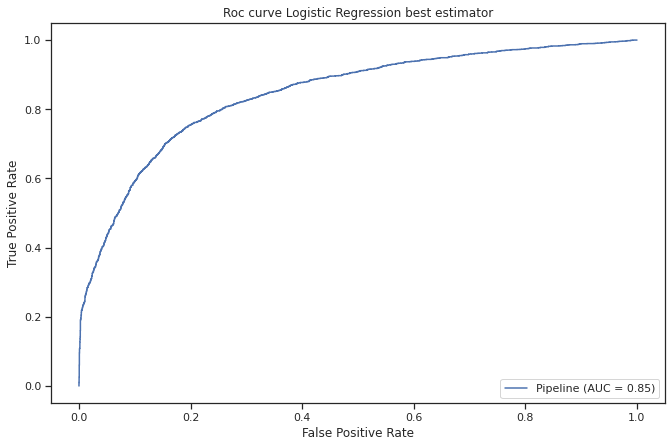

In [ ]:
x = plot_roc_curve(search_lr.best_estimator_, X_test_scaled, y_test) 
plt.title('Roc curve Logistic Regression best estimator')

In [ ]:
x.figure_.savefig('roc_logistic_regression.pdf')

In [ ]:
#'classifier__solver': 'liblinear', 'classifier__penalty': 'l1', 'classifier__C': 1.5}

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(solver='liblinear', penalty='l1', C=1.5), X_train_scaled, y_train, cv=skf_noPca, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

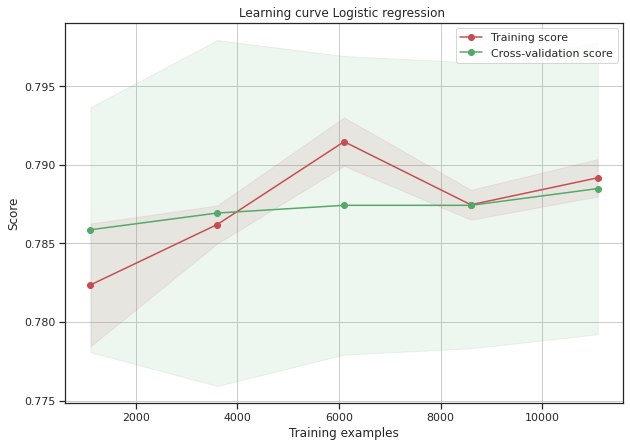

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve Logistic regression')
plt.show()

In [ ]:
fig.savefig('learning_curve_logistic_regression.pdf')

# da cancellare

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(100, max_depth=20, criterion='gini'), X_train_scaled, y_train, cv=skf_noPca, return_times=False)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


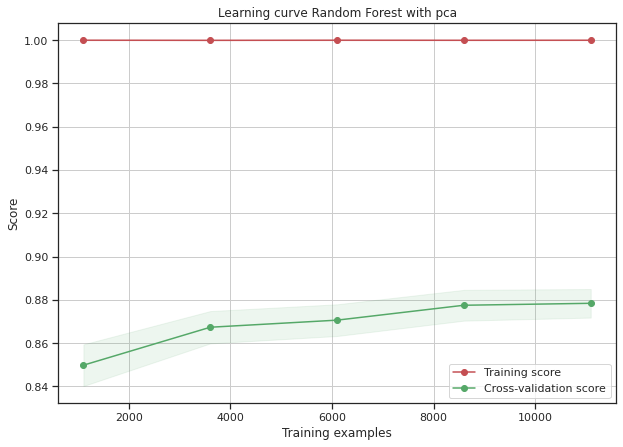

In [ ]:
# Plot learning curve
fig, axe = plt.subplots(figsize=(10, 7))
axe.grid()
axe.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
axe.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
axe.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
axe.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
axe.legend(loc="best")
axe.set_xlabel("Training examples")
axe.set_ylabel("Score")
plt.title('Learning curve Random Forest with pca')

plt.show()